In [2]:
import numpy as np
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import sys

In [4]:
## 학습된 데이터 가지고 오기
## 'imagenet'에 있는 이미지들을 가져옴, include_top = true : 모델의 마지막 노드까지 가져오기
incept_v3_pretrained = keras.applications.inception_v3.InceptionV3(
    weights ='imagenet',
    include_top = True
)

print(incept_v3_pretrained.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

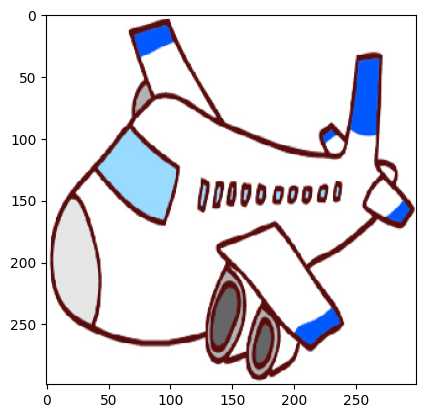

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


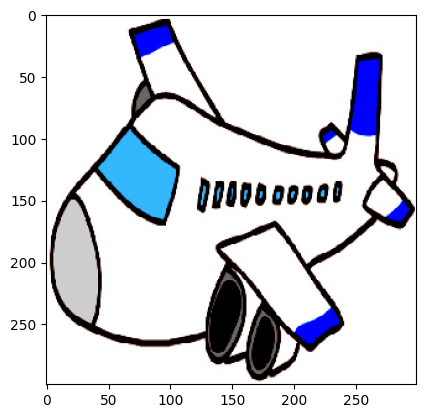

In [9]:
img_path = './fig_ch4/airplane_2.jpeg'

img = keras.preprocessing.image.load_img(img_path, target_size=(299,299))
# print(type(img))
x = keras.preprocessing.image.img_to_array(img)
# print(type(x))
# print(x.shape)
x = np.expand_dims(x,axis=0)
# print(x.shape)

x = keras.applications.inception_v3.preprocess_input(x)

plt.imshow(img)
plt.show()

plt.imshow(x[0])
plt.show()



In [13]:
output = incept_v3_pretrained.predict(x)
# print(output)

list_check = keras.applications.inception_v3.decode_predictions(output, top = 5)

print(list_check)

1/1 [==============================] - 0s 131ms/step
[[('n03532672', 'hook', 0.2260807), ('n03584254', 'iPod', 0.07667422), ('n04317175', 'stethoscope', 0.0669587), ('n03692522', 'loupe', 0.04561371), ('n04141975', 'scale', 0.03770929)]]


In [18]:
list_check[0][0][1]

'hook'

In [22]:
img_cv = cv2.imread('./fig_ch4/airplane_1.jpg')
text = 'Airliner, 88%'
cv2.putText(img_cv, text, (50,50), cv2.FONT_HERSHEY_COMPLEX, 2, (0,0,255),2,cv2.LINE_AA)

cv2.imshow('img', img_cv)

cv2.waitKey()
cv2.destroyAllWindows()

In [29]:
import glob

## glob함수로 사용할 이미지 경로를 리스트로 만듬
paths_list = glob.glob('./fig_ch4/*.*')

## 경로를 순서대로 사용하기 위해 인덱스 변수 선언
idx = 0

## 슬라이드 쇼처럼 보이기 위해 반복문 사용
while True:
    ## 이미지 경로를 순서대로 가져와서 이미지 사용
    img = cv2.imread(paths_list[idx])
    
    ## 이미지가 없으면 다음 반복문 실행
    if img is None:
        continue
    
    ## 모델에 들어갈 이미지 크기 조절 (299,299,3)
    img_check = keras.preprocessing.image.load_img(paths_list[idx], target_size=(299,299))
    ## 이미지를 numpy type으로 변환
    x = keras.preprocessing.image.img_to_array(img_check)
    ## 모델에 사용하려면 차원을 하나 늘려야 하기때문에 expand_dims함수 사용 (1,299,299,3)
    x = np.expand_dims(x,axis=0)
    ## 모델에 맞게 전처리 하는 함수
    x = keras.applications.inception_v3.preprocess_input(x)
    
    ## 예측 후 확률이 가장 높은 순으로 1개를 리스트로 저장
    output = incept_v3_pretrained.predict(x)
    top1 = keras.applications.inception_v3.decode_predictions(output, top = 1)
    
    ## 리스트의 첫 물체의 이름과 확률을 텍스트로 저장해서 화면에 띄우기
    text = f'{top1[0][0][1]}  {100 * top1[0][0][2]:.2f}%'
    cv2.putText(img, text, (25,25), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255),1,cv2.LINE_AA)
    
    cv2.imshow('scene', img)
    
    ## 2초 기다리고 입력이 없으면 넘어가고 esc누르면 반복문 탈출
    if cv2.waitKey(2000) == 27:
        break
    
    ## 파일 경로 리스트의 인덱스를 1씩 증가 시켜서 다음 파일을 사용하도록 조절
    idx += 1
    
    ## 파일 경로 리스트가 끝에 도달하면 다시 처음으로 돌려서 반복적으로 파일을 사용하게 해주는 부분
    if idx >= len(paths_list):
        idx = 0
        
cv2.destroyAllWindows()

1/1 [==============================] - 0s 95ms/step


In [3]:
vgg16_pretrain = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=True
)

vgg16_pretrain.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

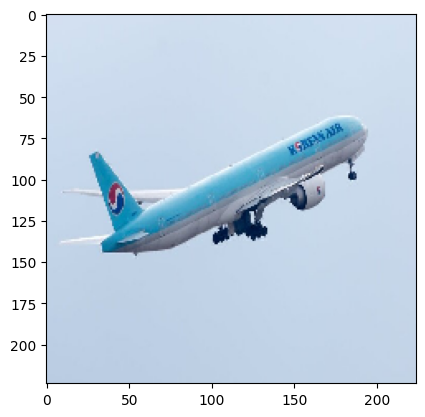

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


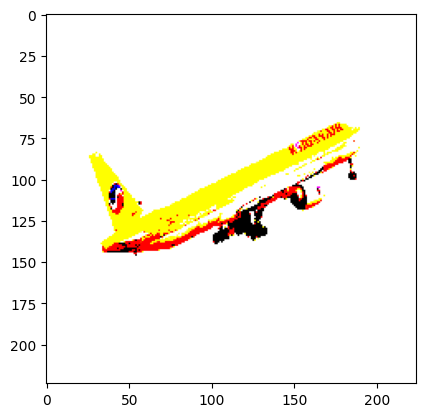

In [4]:
img_path = './fig_ch4/airplane_1.jpg'
img = keras.preprocessing.image.load_img(img_path, target_size=(224,224))
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.vgg16.preprocess_input(x)

plt.imshow(img)
plt.show()

plt.imshow(x[0])
plt.show()

In [5]:
output = vgg16_pretrain.predict(x)
top_5 = keras.applications.vgg16.decode_predictions(output, top = 5)

display(top_5)

1/1 [==============================] - 0s 357ms/step


[[('n02690373', 'airliner', 0.93720007),
  ('n04592741', 'wing', 0.052008033),
  ('n04552348', 'warplane', 0.008485416),
  ('n02692877', 'airship', 0.0021067755),
  ('n03773504', 'missile', 0.0001003527)]]

In [12]:
import glob

## 사용할 파일의 경로를 리스트로 만즐어서 선언
paths_list = glob.glob('./for_test/*.*')

idx = 0

while True:
    ## 이미지 경로를 순서대로 가져와서 이미지 사용
    img = cv2.imread(paths_list[idx])
    img_resize = cv2.resize(img,(400,400))
    
    ## 이미지가 없으면 다음 반복문 실행
    if img is None:
        continue
    
    ## 모델에 들어갈 이미지 크기 조절 (224,224,3)
    img_check = keras.preprocessing.image.load_img(paths_list[idx], target_size=(224,224))
    ## 이미지를 numpy type으로 변환
    x = keras.preprocessing.image.img_to_array(img_check)
    ## 모델에 사용하려면 차원을 하나 늘려야 하기때문에 expand_dims함수 사용 (1,224,224,3)
    x = np.expand_dims(x,axis=0)
    ## 모델에 맞게 전처리 하는 함수
    x = keras.applications.vgg16.preprocess_input(x)
    
    ## 예측 후 확률이 가장 높은 순으로 1개를 리스트로 저장
    output = vgg16_pretrain.predict(x)
    top1 = keras.applications.vgg16.decode_predictions(output, top = 1)
    
    ## 리스트의 첫 물체의 이름과 확률을 텍스트로 저장해서 화면에 띄우기
    text = f'{top1[0][0][1]}  {100 * top1[0][0][2]:.2f}%'
    cv2.putText(img_resize, text, (25,25), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255),1,cv2.LINE_AA)
    
    cv2.imshow('scene', img_resize)
    
    ## 2초 기다리고 입력이 없으면 넘어가고 esc누르면 반복문 탈출
    if cv2.waitKey(2000) == 27:
        break
    
    ## 파일 경로 리스트의 인덱스를 1씩 증가 시켜서 다음 파일을 사용하도록 조절
    idx += 1
    
    ## 파일 경로 리스트가 끝에 도달하면 다시 처음으로 돌려서 반복적으로 파일을 사용하게 해주는 부분
    if idx >= len(paths_list):
        idx = 0
        
cv2.destroyAllWindows()

1/1 [==============================] - 0s 156ms/step


In [16]:
## class별 train set와 test set 이미지 경로 합치기
img_path_ad = glob.glob('./train/ad/*.*') + glob.glob('./test/ad/*.*')
img_path_normal = glob.glob('./train/normal/*.*') + glob.glob('./test/normal/*.*')

## 샘플 개수 확인
print('ad length = ', len(img_path_ad))
print('normal length = ', len(img_path_normal))

## 이미지들의 경로들 모두 합치기
img_paths = img_path_ad + img_path_normal
print(len(img_paths))
display(img_paths)

ad length =  140
normal length =  140
280


['./train/ad\\ad_train_1.jpg',
 './train/ad\\ad_train_10.jpg',
 './train/ad\\ad_train_11.jpg',
 './train/ad\\ad_train_12.jpg',
 './train/ad\\ad_train_13.jpg',
 './train/ad\\ad_train_14.jpg',
 './train/ad\\ad_train_15.jpg',
 './train/ad\\ad_train_16.jpg',
 './train/ad\\ad_train_17.jpg',
 './train/ad\\ad_train_18.jpg',
 './train/ad\\ad_train_19.jpg',
 './train/ad\\ad_train_2.jpg',
 './train/ad\\ad_train_20.jpg',
 './train/ad\\ad_train_21.jpg',
 './train/ad\\ad_train_22.jpg',
 './train/ad\\ad_train_23.jpg',
 './train/ad\\ad_train_24.jpg',
 './train/ad\\ad_train_25.jpg',
 './train/ad\\ad_train_26.jpg',
 './train/ad\\ad_train_27.jpg',
 './train/ad\\ad_train_28.jpg',
 './train/ad\\ad_train_29.jpg',
 './train/ad\\ad_train_3.jpg',
 './train/ad\\ad_train_30.jpg',
 './train/ad\\ad_train_31.jpg',
 './train/ad\\ad_train_32.jpg',
 './train/ad\\ad_train_33.jpg',
 './train/ad\\ad_train_34.jpg',
 './train/ad\\ad_train_35.jpg',
 './train/ad\\ad_train_36.jpg',
 './train/ad\\ad_train_37.jpg',
 './train/a

In [17]:
imgs = np.zeros((0,150,150,3), np.float32)

## 반복문으로 이미지들을 불러들여 색배열, 밝기를 표준화 해서 모델에 들어갈 모양으로 만들어주고 배열로 만들어줌
for i in img_paths:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = (img.astype(np.float32))/255.
    img = np.expand_dims(img, axis=0)
    imgs = np.append(imgs, img,axis=0)
    
print(imgs.shape)

(280, 150, 150, 3)


In [25]:
## 정답 만들어주기
target = np.array([1] * len(img_path_ad) + [0] * len(img_path_normal))

In [26]:
from sklearn.model_selection import train_test_split

## 다시 섞어 훈련세트와 검증세트로 나눠주기
x_train, x_val, y_train, y_val = train_test_split(imgs, target,
                                                  test_size= 0.2, shuffle=True)

print(x_train.shape)
print(x_val.shape)

(224, 150, 150, 3)
(56, 150, 150, 3)


In [22]:
## Functional API

inputs = keras.Input(shape=(150,150,3))
Conv1 = keras.layers.Conv2D(64,kernel_size=3, activation='relu')(inputs)
Conv2 = keras.layers.Conv2D(32,kernel_size=3, activation='relu')(Conv1)
max_pool = keras.layers.MaxPool2D(pool_size=2)(Conv2)
flatten_layer = keras.layers.Flatten()(max_pool)
dense1 = keras.layers.Dense(120,activation='relu')(flatten_layer)
drop_out = keras.layers.Dropout(0.2)(dense1)
dense2 = keras.layers.Dense(32, activation='relu')(drop_out)
output = keras.layers.Dense(1, activation='sigmoid')(dense2)

alz_model = keras.Model(inputs = inputs, outputs = output)

alz_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 146, 146, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 170528)            0         
                                                                 
 dense_3 (Dense)             (None, 120)               20463480  
                                                             

In [27]:
## 모델 컴파일
alz_model.compile(loss = 'binary_crossentropy',
                  optimizer= 'adam',
                  metrics=['acc'])

early_stop = keras.callbacks.EarlyStopping(patience=10)
check_model = keras.callbacks.ModelCheckpoint(filepath='./alz_model.hdf5',
                                              save_best_only=True)

In [28]:
## 모델 훈련
history = alz_model.fit(x_train, y_train, epochs=100,
                        batch_size= 20,
                        validation_data=(x_val,y_val),
                        callbacks=[early_stop, check_model])

Epoch 1/100
12/12 [==============================] - 13s 791ms/step - loss: 0.7401 - acc: 0.5670 - val_loss: 0.7043 - val_acc: 0.4286
Epoch 2/100
12/12 [==============================] - 9s 755ms/step - loss: 0.5677 - acc: 0.6920 - val_loss: 0.3915 - val_acc: 0.8750
Epoch 3/100
12/12 [==============================] - 9s 748ms/step - loss: 0.2940 - acc: 0.9062 - val_loss: 0.1555 - val_acc: 0.9643
Epoch 4/100
12/12 [==============================] - 9s 742ms/step - loss: 0.0912 - acc: 0.9732 - val_loss: 0.1580 - val_acc: 0.9464
Epoch 5/100
12/12 [==============================] - 9s 778ms/step - loss: 0.0404 - acc: 0.9821 - val_loss: 0.1099 - val_acc: 0.9643
Epoch 6/100
12/12 [==============================] - 9s 743ms/step - loss: 0.0137 - acc: 1.0000 - val_loss: 0.2259 - val_acc: 0.9464
Epoch 7/100
12/12 [==============================] - 9s 732ms/step - loss: 0.0249 - acc: 0.9911 - val_loss: 0.2409 - val_acc: 0.9464
Epoch 8/100
12/12 [==============================] - 9s 777ms/step -

In [29]:
alz_model.evaluate(x_val,y_val)

2/2 [==============================] - 0s 147ms/step - loss: 0.1224 - acc: 0.9643


[0.12238132208585739, 0.9642857313156128]

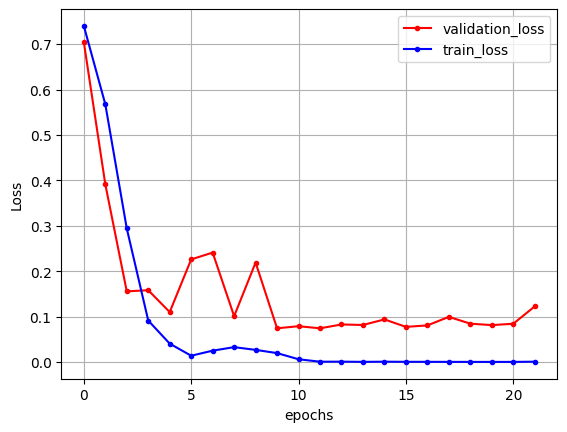

In [31]:
## 그래프로 오차비교
val_loss = history.history['val_loss']
train_loss = history.history['loss']

plt.plot(val_loss, marker = '.',c = 'r', label = 'validation_loss')
plt.plot(train_loss, marker = '.',c = 'b', label = 'train_loss')
plt.legend()
plt.grid()
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [38]:
target = np.array([1] * len(img_path_ad) + [0] * len(img_path_normal))

def img_prep(x):
    x = keras.preprocessing.image.load_img(x, target_size=(150,150))
    x = keras.preprocessing.image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    x = keras.applications.vgg16.preprocess_input(x)
    
    return x

In [39]:
imgs = np.zeros((0,150,150,3), np.float32)

for i in img_paths:
    x = img_prep(i)
    imgs = np.append(imgs, x,axis=0)
    
print(imgs.shape)

(280, 150, 150, 3)


In [40]:
x_train, x_val, y_train, y_val = train_test_split(imgs, target, test_size= 0.2,shuffle= True)

print(x_train.shape)
print(x_val.shape)

(224, 150, 150, 3)
(56, 150, 150, 3)


In [41]:
transfer_vgg16 = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

transfer_vgg16.trainable = False
transfer_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [42]:
finetun_vgg16 = keras.models.Sequential()
finetun_vgg16.add(transfer_vgg16)
finetun_vgg16.add(keras.layers.Flatten())
finetun_vgg16.add(keras.layers.Dense(64, activation = 'relu'))
finetun_vgg16.add(keras.layers.Dropout(0.2))
finetun_vgg16.add(keras.layers.Dense(1, activation= 'sigmoid'))
finetun_vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                524352    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,239,105
Trainable params: 524,417
Non-trainable params: 14,714,688
_________________________________________________________________


In [43]:
finetun_vgg16.compile(loss = 'binary_crossentropy',
                  optimizer= 'adam',
                  metrics=['acc'])

early_stop = keras.callbacks.EarlyStopping(patience=10)
check_model = keras.callbacks.ModelCheckpoint(filepath='./finetun_vgg16.hdf5',
                                              save_best_only=True)

In [44]:
history = finetun_vgg16.fit(x_train, y_train, epochs=100,
                        batch_size= 20,
                        validation_data=(x_val,y_val),
                        callbacks=[early_stop, check_model])

Epoch 1/100
12/12 [==============================] - 15s 1s/step - loss: 1.6367 - acc: 0.7902 - val_loss: 0.6619 - val_acc: 0.9464
Epoch 2/100
12/12 [==============================] - 14s 1s/step - loss: 0.9668 - acc: 0.9196 - val_loss: 0.0759 - val_acc: 0.9821
Epoch 3/100
12/12 [==============================] - 14s 1s/step - loss: 0.2587 - acc: 0.9688 - val_loss: 0.0108 - val_acc: 1.0000
Epoch 4/100
12/12 [==============================] - 14s 1s/step - loss: 0.1709 - acc: 0.9732 - val_loss: 0.2523 - val_acc: 0.9821
Epoch 5/100
12/12 [==============================] - 14s 1s/step - loss: 0.1404 - acc: 0.9688 - val_loss: 0.0711 - val_acc: 0.9821
Epoch 6/100
12/12 [==============================] - 14s 1s/step - loss: 0.1032 - acc: 0.9732 - val_loss: 0.1507 - val_acc: 0.9821
Epoch 7/100
12/12 [==============================] - 14s 1s/step - loss: 0.0968 - acc: 0.9777 - val_loss: 0.2009 - val_acc: 0.9821
Epoch 8/100
12/12 [==============================] - 14s 1s/step - loss: 0.0753 - a

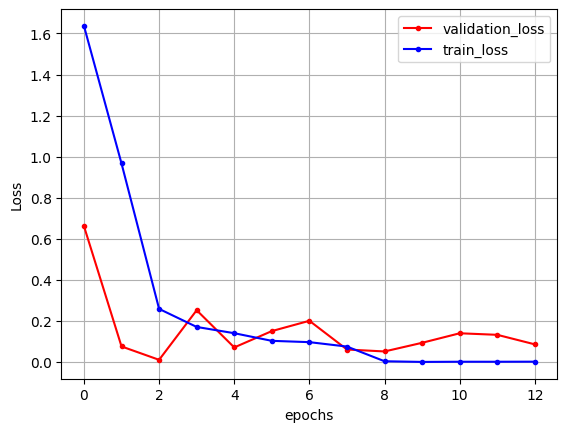

In [45]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']

plt.plot(val_loss, marker = '.',c = 'r', label = 'validation_loss')
plt.plot(train_loss, marker = '.',c = 'b', label = 'train_loss')
plt.legend()
plt.grid()
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()